# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [20]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [21]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('/Users/kaizen/Data Science/Springboard/Inferential Statistics/hospital_readmit/data/cms_hospital_readmissions.csv')

In [22]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [23]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


****
## Preliminary Analysis

In [25]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 0 to 16857
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null object
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.1+ MB


In [27]:
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16661,MARLBORO PARK HOSPITAL,420054,SC,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16818,STAMFORD MEMORIAL HOSPITAL,450306,TX,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16565,CITIZENS BAPTIST MEDICAL CENTER,10101,AL,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
13762,P H S INDIAN HOSPITAL AT BROWNING - BLACKFEET,270074,MT,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


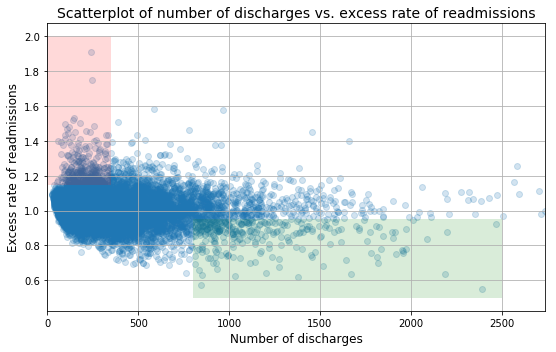

In [28]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

### Exercise Part A

I do not agree with the above analysis because the scatter plot above is only highlighting one area of the data that supports the preliminary report while ignoring the rest of the pertinent data. In order to confirm or reject the claim that there is a significant correlation between hospital capacity or number of discharges and readmission rates, we can peform a linear regression analysis and then hypothesis testing to illustrate statistical and practical significance.

### Exercise Part B
We start our regression analysis with computing the R-square and plotting the two variables to gauge the correlation 

In [53]:
# Import necessary packages for analysis
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats

# Select our X-values (non-zero number of discharges or hospital capacity)
X = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 0]['Number of Discharges']

# Select Y-values (non-zero excess readmission rates)
y = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'] > 0]['Excess Readmission Ratio']

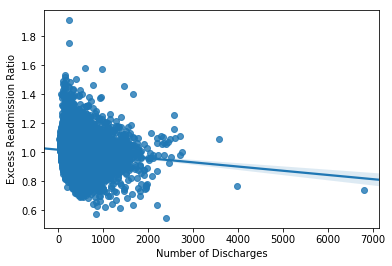

In [54]:
# Plot and visualize 
sns.regplot(x=X, y=y)

In [55]:
# Calculate the Pearson correlation 
corr = stats.pearsonr(X,y)
print('The Pearson correlation coefficient: {}'.format(corr[0]))
print('The p-value of a two-tailed test: {}'.format(corr[1]))

The Pearson correlation coefficient: -0.09739794351079353
The p-value of a two-tailed test: 1.222547377680967e-25


In [58]:
# Compute R-squared value using the square of correlation 
r_squared = corr[0]**2
print('R-squared value: ', r_squared)

R-squared value:  0.009486359400131728


#### Linear Regression Results

We see that there is indeed a small correlation between readmissions and discharges with a 0.00949 R-squared and a -.0974 negative correlation. However, this correlation seem very marginal despite the resulting p-value showing statistical signficance. This leads us to question if this statistical significance will translate to practical signficance and hence deserving of comprehensive regulatory policy corrections. From the graph above, we see there are a few outliers that could definitely change the true relationship between our two variables.  

### Hypothesis Test on Pearson Correlation

To dig deeper, we perform a simulation to truly assess if readmissions is correlated with discharges or if the correlation is just by chance

In [65]:
# Permute the Number of Discharges while leaving the Readmissions values fixed
# to simulate the hypothesis that they are totally independent of each other 

# Define Pearson corr function
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)
    # Return entry [0,1]
    return corr_mat[0,1]


# Compute Pearson correlation coefficient for each permutation and
# assess how many of your permutation replicates have a Pearson corrcoef greater than the observed one

# Observed Pearson correlation
observed = pearson_r(X, y)
observed

-0.0973979435107935

In [66]:
# Initialize permutation replicates
reps = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute number of discharges (hospital capacity)
    discharges_permuted = np.random.permutation(X)
    # Compute Pearson correlation
    reps[i] = pearson_r(discharges_permuted, y)
    
# Compute p-value
p_val = np.sum(reps >= observed) / len(reps)
print('p-value= ', p_val)

p-value=  1.0


### Hypothesis Test Results

As we can see above, when we perform random resampling with permutations, our p-value is significantly different and much higher than before. This indicates that we cannot reject our null hypothesis that there's no correlation, so we can now conclude that there is no significance in the correlation between discharges and readmission rates. Our previous significant result is likely due to outliers hospitals with more than 4000 discharges and higher than 1.5 readmission ratios.  

#3 Changing the statistical significance level to 0.01 from 0.05 will make no difference in either of our previous two p-value calculations

#4 While our first operation show that there is a statistical significance, when we use resampling, we see that there is no statistical significance. Additionally, there is no practical significance since the correlation is very small at -0.09739794351079353 from both tests. 

Thus, the recommendation to the client should change to carry out operations that will pinpoint a statistical and practical significance variable other than the variable of number of discharges or hospital capacity. 

#5 

**Advantages** of using the first plot to convey information:

- Eye-catching and easy to interpret the supposed negative correlation trend 
- Visually-appealing and clearly show density of the data

**Disadvantages** of using the first plot to convey information:

- Highlights lead to misleading conclusions 
- No correlation coefficient and p-value to show significance 

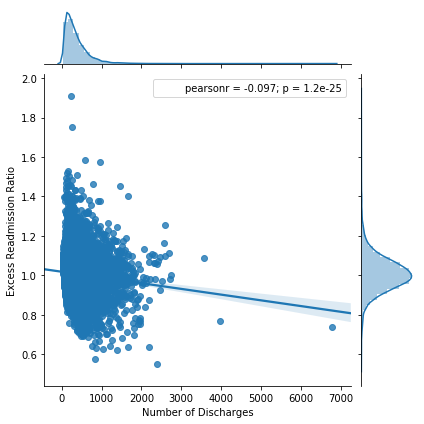

In [68]:
# More direct plot
sns.jointplot(X, y, kind='reg')